Identifying the Common Audio features that co occur in popular tracks spotify

In [51]:
# Importing Top 50 global data using Spotify API
data <- read.csv('top_50_global.csv')
head(data)

track_id              
1 6tNQ70jh4OwmPGpYy6R2o9
2 3w0w2T288dec0mgeZZqoNN
3 7AYmToZ5y67fBjq4RLFbuq
4 3rUGC1vUpkDG9CZFHMur1t
5 1BxfuPKGuaTgP7aM0Bbdwr
6 0R6NfOiLzLj4O5VbYSJAjf
  artists                                                    album_name      
1 Benson Boone                                               Beautiful Things
2 ¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti VULTURES 1      
3 Beyoncé                                                    TEXAS HOLD 'EM  
4 Tate McRae                                                 greedy          
5 Taylor Swift                                               Lover           
6 Xavi                                                       La Diabla       
  track_name       popularity duration_ms explicit danceability energy key
1 Beautiful Things  99        180304      False    0.472        0.471  10 
2 CARNIVAL          93        264324      True     0.594        0.811   1 
3 TEXAS HOLD 'EM    85        235636      True     0.725        0.709   2 
4 greedy            99        131872      True     0.750        0.733   6 
5 Cruel Summer     100        178426      False    0.552        0.702   9 
6 La Diabla         99        172264      False    0.751        0.819  11 
  loudness mode speechiness acousticness instrumentalness liveness valence
1 -5.692   1    0.0603      0.151        0.00e+00         0.140    0.219  
2 -5.746   1    0.1590      0.189        0.00e+00         0.339    0.311  
3 -6.514   1    0.0720      0.588        0.00e+00         0.135    0.353  
4 -3.180   0    0.0319      0.256        0.00e+00         0.114    0.844  
5 -5.707   1    0.1570      0.117        2.06e-05         0.105    0.564  
6 -4.372   0    0.0409      0.255        0.00e+00         0.236    0.697  
  tempo   time_signature
1 105.029 3             
2 148.144 4             
3 110.024 4             
4 111.018 1             
5 169.994 4             
6 131.842 3

In [52]:
# Taking the neccesary column for Analysis
df <- subset(data, select = c(danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo))
head(df)

danceability energy loudness speechiness acousticness instrumentalness
1 0.472        0.471  -5.692   0.0603      0.151        0.00e+00        
2 0.594        0.811  -5.746   0.1590      0.189        0.00e+00        
3 0.725        0.709  -6.514   0.0720      0.588        0.00e+00        
4 0.750        0.733  -3.180   0.0319      0.256        0.00e+00        
5 0.552        0.702  -5.707   0.1570      0.117        2.06e-05        
6 0.751        0.819  -4.372   0.0409      0.255        0.00e+00        
  liveness valence tempo  
1 0.140    0.219   105.029
2 0.339    0.311   148.144
3 0.135    0.353   110.024
4 0.114    0.844   111.018
5 0.105    0.564   169.994
6 0.236    0.697   131.842

In [53]:
summary(df)

  danceability        energy          loudness        speechiness     
 Min.   :0.4110   Min.   :0.0911   Min.   :-17.665   Min.   :0.02560  
 1st Qu.:0.5537   1st Qu.:0.5465   1st Qu.: -7.596   1st Qu.:0.04015  
 Median :0.6820   Median :0.6965   Median : -5.978   Median :0.05810  
 Mean   :0.6662   Mean   :0.6504   Mean   : -6.302   Mean   :0.08722  
 3rd Qu.:0.7770   3rd Qu.:0.7863   3rd Qu.: -4.432   3rd Qu.:0.09527  
 Max.   :0.9430   Max.   :0.8850   Max.   : -2.248   Max.   :0.39300  
  acousticness     instrumentalness       liveness         valence      
 Min.   :0.00234   Min.   :0.000e+00   Min.   :0.0232   Min.   :0.0743  
 1st Qu.:0.05090   1st Qu.:0.000e+00   1st Qu.:0.0983   1st Qu.:0.3142  
 Median :0.14600   Median :3.020e-06   Median :0.1255   Median :0.4715  
 Mean   :0.25500   Mean   :1.004e-02   Mean   :0.1863   Mean   :0.4933  
 3rd Qu.:0.36450   3rd Qu.:8.472e-05   3rd Qu.:0.1883   3rd Qu.:0.6705  
 Max.   :0.96900   Max.   :2.670e-01   Max.   :0.8560   Max.   :0

In [54]:

# Install the package if not yet installed
packages <- c("tidyverse", "readr", "arules", "arulesViz", "gridExtra", "RColorBrewer")

# Load packages if not already loaded
for (package in packages) {
         if (!require(package, character.only = TRUE)) {
                  install.packages(package)
                  library(package, character.only = TRUE)
         }
}

In [55]:
library(arules)

In [56]:
# Convert the data frame to a transaction object
trans <- as(df, "transactions")

# generating the association rules from frequent itemsets
ruleParameters <- list(supp = 0.05, conf = 0.5)
associationRules <- apriori(trans, parameter = ruleParameters, control = list(verbose = FALSE))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9 not logical or factor. Applying default discretization (see '? discretizeDF').”
Warning message in discretize(x = c(0, 0, 0, 0, 2.06e-05, 0, 1.9e-05, 1.39e-06, :
“The calculated breaks are: 0, 0, 2.32666666666667e-05, 0.267
  Only unique breaks are used reducing the number of intervals. Look at ? discretize for details.”


In [57]:
inspect(head(trans, n=5))

    items                            transactionID
[1] {danceability=[0.411,0.596),                  
     energy=[0.0911,0.572),                       
     loudness=[-6.87,-5.03),                      
     speechiness=[0.0447,0.0731),                 
     acousticness=[0.0688,0.255),                 
     instrumentalness=[0,2.33e-05),               
     liveness=[0.104,0.156),                      
     valence=[0.0743,0.351),                      
     tempo=[67.5,107)}                           1
[2] {danceability=[0.411,0.596),                  
     energy=[0.738,0.885],                        
     loudness=[-6.87,-5.03),                      
     speechiness=[0.0731,0.393],                  
     acousticness=[0.0688,0.255),                 
     instrumentalness=[0,2.33e-05),               
     liveness=[0.156,0.856],                      
     valence=[0.0743,0.351),                      
     tempo=[128,186]}                            2
[3] {danceability=[0.596,0.739)

In [58]:
library(arulesViz)

# summarise and plot associationRules
summary(associationRules)

set of 3556 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4    5    6    7 
   1   78 1311 1551  530   78    7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.785   4.000   7.000 

summary of quality measures:
    support          confidence        coverage           lift       
 Min.   :0.06000   Min.   :0.5000   Min.   :0.0600   Min.   :0.7576  
 1st Qu.:0.06000   1st Qu.:0.6000   1st Qu.:0.0800   1st Qu.:1.5873  
 Median :0.06000   Median :0.7500   Median :0.1000   Median :1.9608  
 Mean   :0.07406   Mean   :0.7465   Mean   :0.1064   Mean   :2.0740  
 3rd Qu.:0.08000   3rd Qu.:1.0000   3rd Qu.:0.1200   3rd Qu.:2.5000  
 Max.   :0.66000   Max.   :1.0000   Max.   :1.0000   Max.   :3.3333  
     count       
 Min.   : 3.000  
 1st Qu.: 3.000  
 Median : 3.000  
 Mean   : 3.703  
 3rd Qu.: 4.000  
 Max.   :33.000  

mining info:
  data ntransactions support confidence
 trans            50    0.05        0.5
                           

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



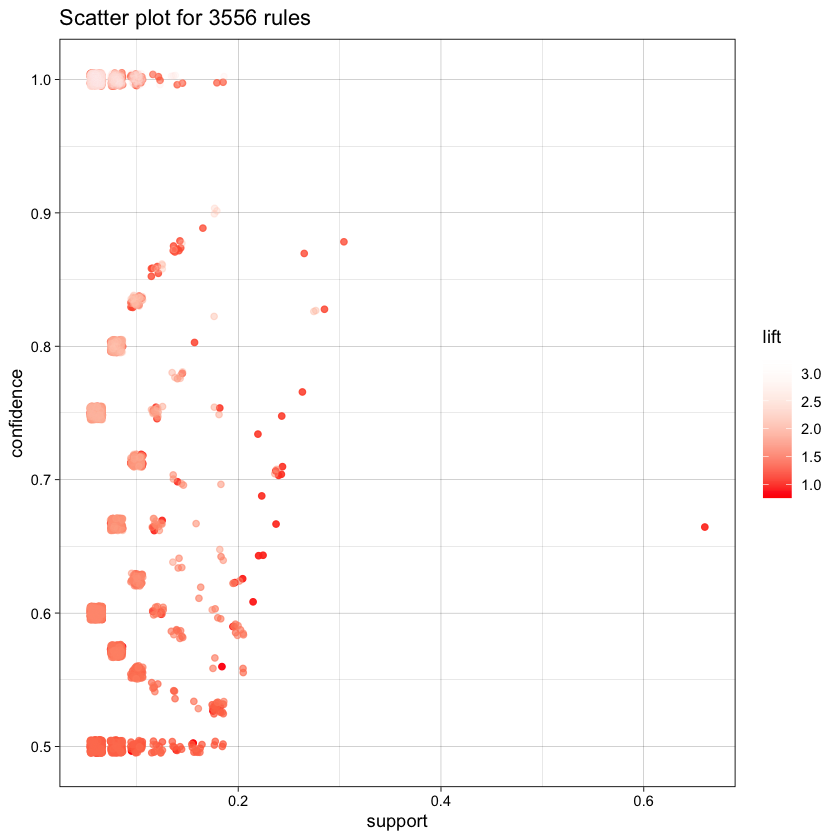

In [59]:
plot(associationRules, col="red")

Warning message:
“Unknown control parameters: type, border, main”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


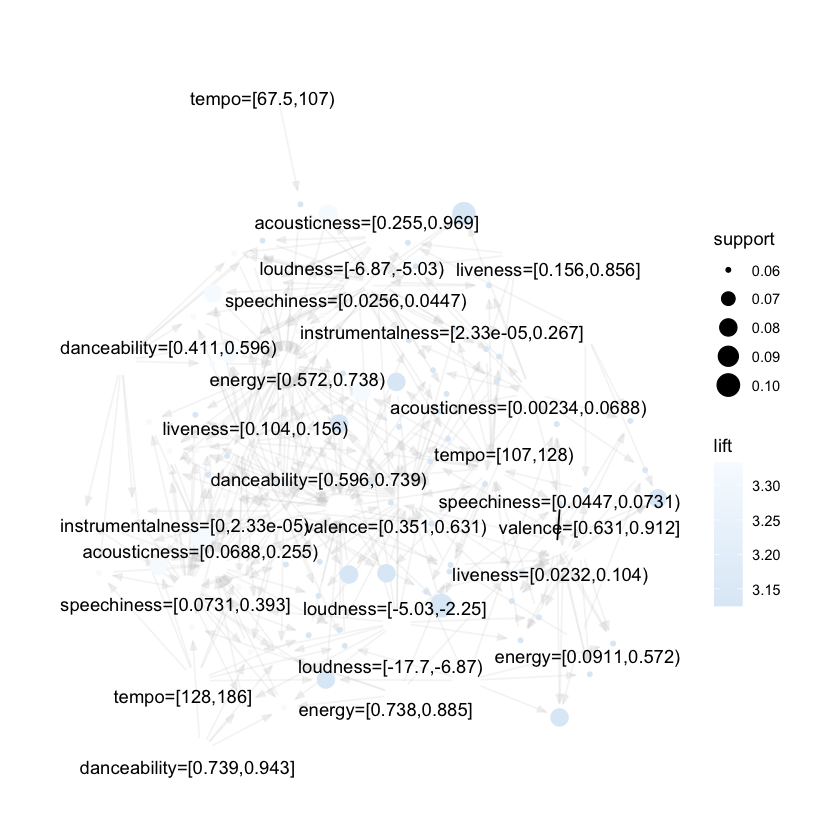

In [60]:
# plot associationRules
mypal <- brewer.pal(9, "Blues")
set.seed(123)
plot(associationRules, method = "graph", measure = "support", shading = "lift", main = "Association Rules Graph", 
     control = list(type = "items", border = "black", col = mypal))

In [61]:
library(arulesViz)
mypal <- rev(brewer.pal(9, "Blues"))

Itemsets in Antecedent (LHS)
   [1] "{danceability=[0.596,0.739),loudness=[-5.03,-2.25],tempo=[107,128)}"                                                                                                
   [2] "{danceability=[0.411,0.596),loudness=[-6.87,-5.03),acousticness=[0.255,0.969]}"                                                                                     
   [3] "{danceability=[0.739,0.943],energy=[0.738,0.885],liveness=[0.104,0.156)}"                                                                                           
   [4] "{danceability=[0.596,0.739),acousticness=[0.0688,0.255),instrumentalness=[0,2.33e-05),valence=[0.351,0.631)}"                                                       
   [5] "{loudness=[-5.03,-2.25],instrumentalness=[0,2.33e-05),liveness=[0.104,0.156),tempo=[107,128)}"                                                                      
   [6] "{danceability=[0.596,0.739),instrumentalness=[0,2.33e-05),liveness=[0.104,0.156),valence=[0.351,0.

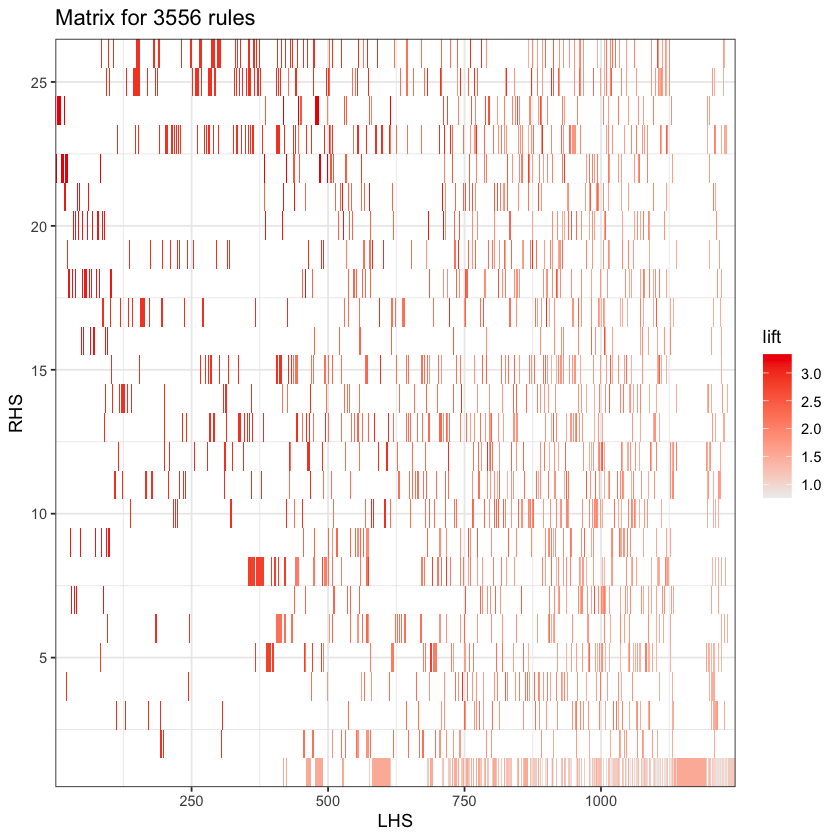

In [62]:
plot(associationRules, method = "matrix", measure = c("support", "confidence"), shading = "lift", col = mypal)

In [63]:
library(tidyr)

In [64]:
library(dplyr)

In [65]:
# Identify frequent itemsets
freq_items <- itemFrequency(trans)

# Print frequent itemsets
print(sort(freq_items, decreasing = TRUE))

    instrumentalness=[0,2.33e-05)              energy=[0.738,0.885] 
                             0.66                              0.36 
       acousticness=[0.255,0.969]        danceability=[0.411,0.596) 
                             0.36                              0.34 
       danceability=[0.739,0.943]             energy=[0.0911,0.572) 
                             0.34                              0.34 
           loudness=[-17.7,-6.87)            loudness=[-5.03,-2.25] 
                             0.34                              0.34 
      speechiness=[0.0256,0.0447)        speechiness=[0.0731,0.393] 
                             0.34                              0.34 
    acousticness=[0.00234,0.0688) instrumentalness=[2.33e-05,0.267] 
                             0.34                              0.34 
           liveness=[0.104,0.156)            liveness=[0.156,0.856] 
                             0.34                              0.34 
           valence=[0.0743,0.351) 

In [66]:
sorted_items <- sort(freq_items, decreasing = TRUE)

# Print the top 15 most frequent itemsets
head(sorted_items, 15)

instrumentalness=[0,2.33e-05)              energy=[0.738,0.885] 
                             0.66                              0.36 
       acousticness=[0.255,0.969]        danceability=[0.411,0.596) 
                             0.36                              0.34 
       danceability=[0.739,0.943]             energy=[0.0911,0.572) 
                             0.34                              0.34 
           loudness=[-17.7,-6.87)            loudness=[-5.03,-2.25] 
                             0.34                              0.34 
      speechiness=[0.0256,0.0447)        speechiness=[0.0731,0.393] 
                             0.34                              0.34 
    acousticness=[0.00234,0.0688) instrumentalness=[2.33e-05,0.267] 
                             0.34                              0.34 
           liveness=[0.104,0.156)            liveness=[0.156,0.856] 
                             0.34                              0.34 
           valence=[0.0743,0.351) 
                             0.34

In [67]:
# Sort associationRules by lift in decreasing order
lift_sorted_rules <- sort(associationRules, by='lift', decreasing = TRUE)
# associationRules[order(-associationRules$lift), ]

# Print the top 10 rules with the highest lift values
inspect(head(lift_sorted_rules, n=15))


     lhs                                 rhs                           support confidence coverage     lift count
[1]  {danceability=[0.596,0.739),                                                                                
      acousticness=[0.0688,0.255)}    => {energy=[0.572,0.738)}           0.06          1     0.06 3.333333     3
[2]  {loudness=[-6.87,-5.03),                                                                                    
      acousticness=[0.255,0.969]}     => {energy=[0.572,0.738)}           0.08          1     0.08 3.333333     4
[3]  {speechiness=[0.0256,0.0447),                                                                               
      liveness=[0.104,0.156)}         => {energy=[0.572,0.738)}           0.08          1     0.08 3.333333     4
[4]  {danceability=[0.411,0.596),                                                                                
      speechiness=[0.0731,0.393]}     => {acousticness=[0.0688,0.255)}    0.06          

In [68]:
plot(lift_sorted_rules, method = 'graph', engine = 'htmlwidget')

Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


HTML widgets cannot be represented in plain text (need html)

In [69]:
# Sort associationRules by lift in decreasing order
support_sorted_rules <- sort(associationRules, by='support', decreasing = TRUE)
# associationRules[order(-associationRules$lift), ]

# Print the top 10 rules with the highest lift values
inspect(head(support_sorted_rules, n=15))


     lhs                              rhs                             support confidence coverage     lift count
[1]  {}                            => {instrumentalness=[0,2.33e-05)}    0.66  0.6600000     1.00 1.000000    33
[2]  {liveness=[0.104,0.156)}      => {instrumentalness=[0,2.33e-05)}    0.30  0.8823529     0.34 1.336898    15
[3]  {loudness=[-17.7,-6.87)}      => {energy=[0.0911,0.572)}            0.28  0.8235294     0.34 2.422145    14
[4]  {energy=[0.0911,0.572)}       => {loudness=[-17.7,-6.87)}           0.28  0.8235294     0.34 2.422145    14
[5]  {speechiness=[0.0731,0.393]}  => {instrumentalness=[0,2.33e-05)}    0.28  0.8235294     0.34 1.247772    14
[6]  {acousticness=[0.0688,0.255)} => {instrumentalness=[0,2.33e-05)}    0.26  0.8666667     0.30 1.313131    13
[7]  {loudness=[-5.03,-2.25]}      => {instrumentalness=[0,2.33e-05)}    0.26  0.7647059     0.34 1.158645    13
[8]  {valence=[0.351,0.631)}       => {instrumentalness=[0,2.33e-05)}    0.24  0.7500000     0.3

In [70]:
plot(support_sorted_rules, method = 'graph', engine = 'htmlwidget')

Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


HTML widgets cannot be represented in plain text (need html)

In [71]:
# Sort associationRules by lift in decreasing order
confidence_sorted_rules <- sort(associationRules, by='confidence', decreasing = TRUE)
# associationRules[order(-associationRules$lift), ]

# Print the top 10 rules with the highest lift values
inspect(head(confidence_sorted_rules, n=15))

     lhs                               rhs                             support confidence coverage     lift count
[1]  {danceability=[0.596,0.739),                                                                                
      acousticness=[0.0688,0.255)}  => {energy=[0.572,0.738)}             0.06          1     0.06 3.333333     3
[2]  {energy=[0.572,0.738),                                                                                      
      acousticness=[0.0688,0.255)}  => {instrumentalness=[0,2.33e-05)}    0.10          1     0.10 1.515152     5
[3]  {energy=[0.572,0.738),                                                                                      
      tempo=[67.5,107)}             => {loudness=[-6.87,-5.03)}           0.06          1     0.06 3.125000     3
[4]  {loudness=[-6.87,-5.03),                                                                                    
      acousticness=[0.255,0.969]}   => {energy=[0.572,0.738)}             0.08          

In [72]:
plot(confidence_sorted_rules, method = 'graph', engine = 'htmlwidget')

Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


HTML widgets cannot be represented in plain text (need html)

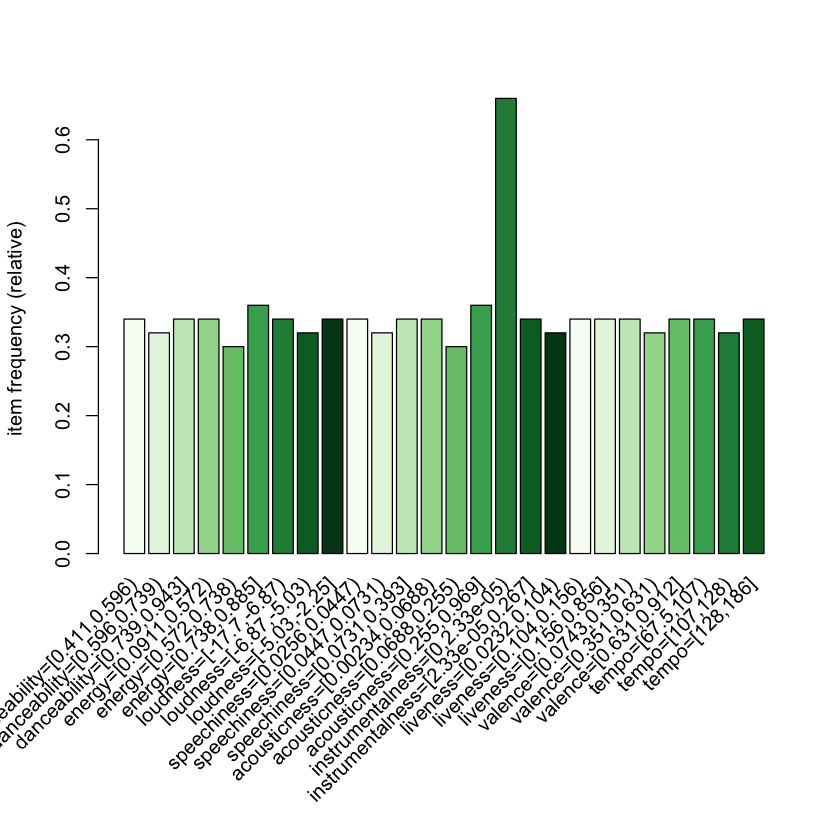

In [73]:
library(arulesViz)

mypal <- brewer.pal(9, "Greens")

# Item frequency plot with specified width
itemFrequencyPlot(trans, support = 0.01, col = mypal, width = 10) # Adjust width as needed
